In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import rainbow
import numpy as np
from scipy.integrate import odeint

In [20]:
# Generate training data

def hopf(x, mu, omega, A):
    return [
        mu * x[0] - omega * x[1] - A * x[0] * (x[0] ** 2 + x[1] ** 2),
        omega * x[0] + mu * x[1] - A * x[1] * (x[0] ** 2 + x[1] ** 2),
    ]


omega = 1
A = 1

dt = 0.025
t_train = np.arange(0, 75, dt)
eps=0.00
mu_unstable = np.array([0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55])

n_ics = mu_unstable.size
x_train = [np.zeros((t_train.size, 3)) for i in range(n_ics)]

ic_idx = 0

for mu in mu_unstable:
    x0_train = [2, 0]
    x = odeint(lambda x, t: hopf(x, mu, omega, A), x0_train, t_train)
    x_train[ic_idx][:, 0:2] = x + eps * np.random.normal(size=x.shape)
    x_train[ic_idx][:, 2] = mu
    ic_idx += 1

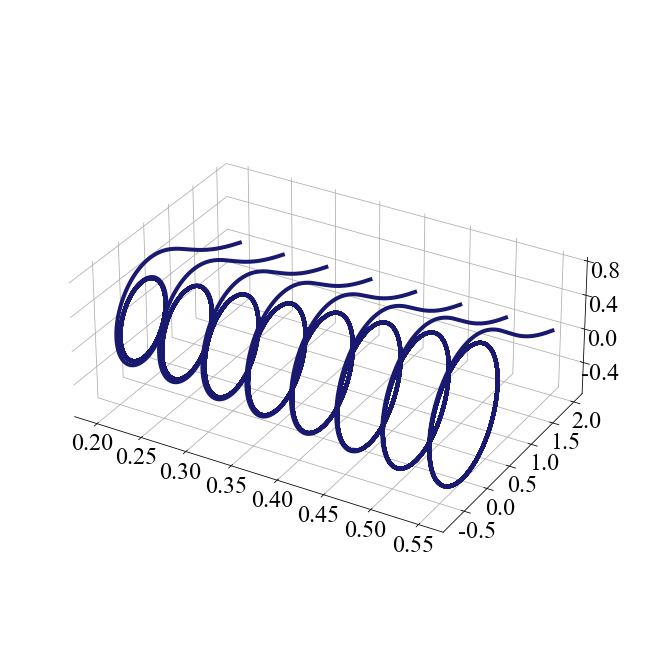

In [21]:
from matplotlib.pyplot import MultipleLocator
plt.rcParams['axes.unicode_minus']=False
fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(111, projection="3d")
for i in range(n_ics):
    ax.plot(x_train[i][:, 2], x_train[i][:, 0], x_train[i][:, 1], "midnightblue", linewidth=4.0)
    
font2 = {'family': 'Times New Roman',
             'weight': 'normal',
             'size': 34,
             }

x_major_locator=MultipleLocator(0.05)
y_major_locator=MultipleLocator(0.5)
z_major_locator=MultipleLocator(0.4)
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
ax.zaxis.set_major_locator(z_major_locator)

ax.tick_params(axis='x',labelsize=24,width=40)
ax.tick_params(axis='y',labelsize=24,width=40)
ax.tick_params(axis='z',labelsize=24,width=40)

labels = ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels()
[label.set_fontname('Times New Roman') for label in labels]
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 0.7, 0.5, 1]))
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.set_xlabel(' ',font2)
ax.set_ylabel(' ',font2)
ax.set_zlabel(' ',font2)
plt.savefig('./hopf.jpg',dpi=2000)